In [1]:
# Parsing data from web
import requests
r = requests.get('https://www.ratingraph.com/serie/rick_and_morty-3607/')

In [2]:
# Looking for the <script> tag that, contains all the tables
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')
results = soup.find('script', type='application/ld+json').text

In [3]:
# Converting the data into json format
import json
data = json.loads(results)

In [4]:
# transforming json into pd.DataFrame
import pandas as pd

episodes_data = pd.DataFrame()
episode_number = 1
for i in range(len(data['containsSeason'])):
    ratingsList = []
    length = len(data['containsSeason'][i]['episode'])
    for j in range(length):
        ratingsList.append(data['containsSeason'][i]['episode'][j]['aggregateRating']['ratingValue'])
        
    episodes_data = episodes_data.append(pd.DataFrame({
                                        'season_number': i + 1,
                                        'episode_number': range(episode_number, length + episode_number),
                                        'episode_rating': ratingsList
                                    }).set_index('season_number'))
    episode_number += length
    
episodes_data.episode_rating = pd.to_numeric(episodes_data.episode_rating)

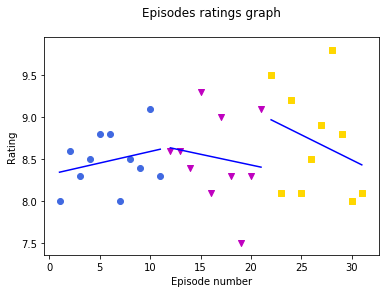

In [7]:
# Training the model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dots_colors = ['royalblue', 'm', 'gold']
markers = ['o', 'v', 's']

for index in range(1, len(data['containsSeason']) + 1):
    X = episodes_data.loc[index].iloc[:, :-1].values
    y = episodes_data.loc[index].iloc[:, -1].values
    
    regressor = LinearRegression()
    regressor.fit(X, y)
    y_pred = regressor.predict(X)
    
    plt.scatter(X, y, color = dots_colors[index - 1], marker = markers[index - 1])
    plt.plot(X, y_pred, color = 'blue')

plt.title('Episodes ratings graph\n')
plt.xlabel('Episode number')
plt.ylabel('Rating')
plt.show()